<a href="https://colab.research.google.com/github/FlemmeFacile/data_base_foundations/blob/main/%D0%B4%D0%B72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import graphviz

def visualise_database_schema():
    dot = graphviz.Digraph('database', comment='Структура базы данных')
    dot.attr(label='Концептуальное представление возможной БД для сайта duolingo.com', labelloc='t', fontsize='16')
    dot.attr(rankdir='LR')
    dot.attr(nodesep='1.0')
    dot.attr(ranksep='1.5')

    tables = {
        'Users': {
            'attributes': {
                'user_id': '(PK)',
                'username': '',
                'email': '',
                'password_hash': '',
                'created_at': '',
                'last_login': ''
            }
        },
        'Courses': {
            'attributes': {
                'course_id': '(PK)',
                'course_name': '',
                'language': '',
                'difficulty_level': ''
            }
        },
        'Lessons': {
            'attributes': {
                'lesson_id': '(PK)',
                'course_id': '(FK)',
                'lesson_name': '',
                'content': ''
            }
        },
        'UserProgress': {
            'attributes': {
                'progress_id': '(PK)',
                'user_id': '(FK)',
                'lesson_id': '(FK)',
                'completion_date': '',
                'score': ''
            }
        },
        'Achievements': {
            'attributes': {
                'achievement_id': '(PK)',
                'achievement_name': '',
                'description': ''
            }
        },
        'UserAchievements': {
            'attributes': {
                'user_achievement_id': '(PK)',
                'user_id': '(FK)',
                'achievement_id': '(FK)',
                'achieved_at': ''
            }
        }
    }

    for table_name, table_data in tables.items():
        rows = []
        for attr, key_type in table_data['attributes'].items():
            row_id = f"{table_name}_{attr}"
            rows.append(f'<tr><td port="{row_id}_left" align="left" border="1">{attr}</td>'
                        f'<td port="{row_id}_right" align="left" border="1">{key_type}</td></tr>')

        label = f"""<<table border="0" cellborder="1" cellspacing="0" cellpadding="4">
          <tr><td colspan="2" align="center" border="1"><b>{table_name}</b></td></tr>
          {''.join(rows)}
        </table>>"""

        dot.node(table_name, shape='none', label=label)

    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('Users')
        s.node('Courses')
        s.node('Achievements')

    with dot.subgraph() as s:
        s.attr(rank='same')
        s.node('Lessons')
        s.node('UserProgress')
        s.node('UserAchievements')

    edges = [

        ('Users:Users_user_id_right', 'UserProgress:UserProgress_user_id_left', 'user_id'),
        ('Courses:Courses_course_id_right', 'Lessons:Lessons_course_id_left', 'course_id'),
        ('Achievements:Achievements_achievement_id_right', 'UserAchievements:UserAchievements_achievement_id_left', 'achievement_id'),

        ('Lessons:Lessons_lesson_id_left', 'UserProgress:UserProgress_lesson_id_left', 'lesson_id'),
        ('Users:Users_user_id_right', 'UserAchievements:UserAchievements_user_id_left', 'user_id'),
    ]

    for from_table_attr, to_table_attr, key in edges:
        dot.edge(from_table_attr, to_table_attr, label=key)

    dot.render('database_schema_final', view=True, format='pdf')

if __name__ == "__main__":
    visualise_database_schema()


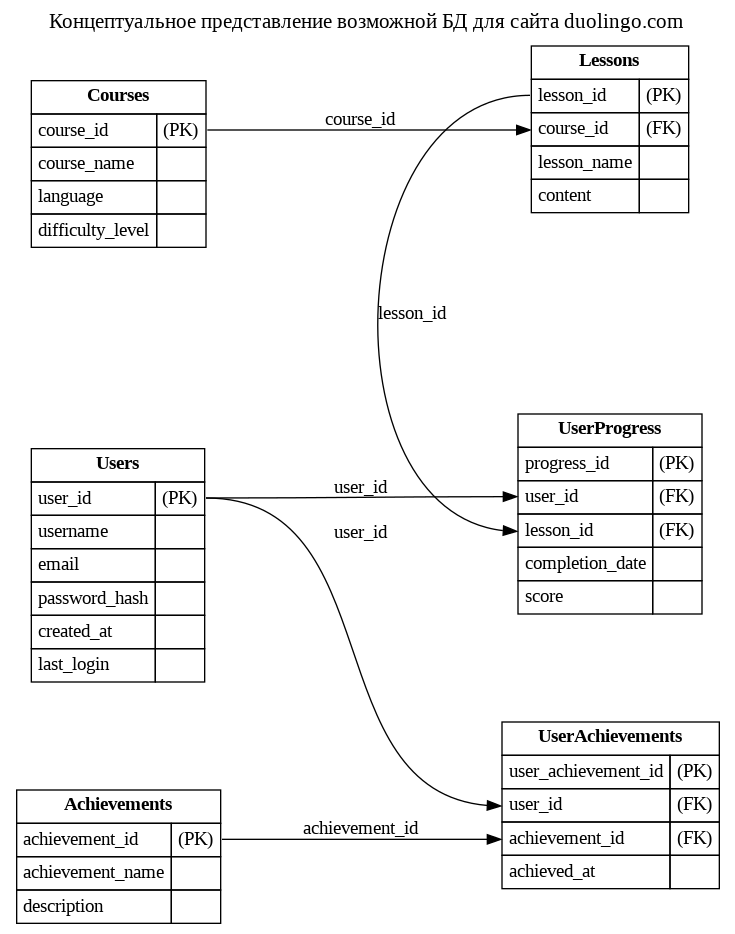